## Task2 -Prediction Using Unsupervised ML
- **Predicting the optimum number of clusters and represent it visually in**  *Iris dataset*.


### Author: SOUBHAGYA RANJAN BAL

In [1]:
#Importing Liabraries
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn import preprocessing 
warnings.filterwarnings("ignore")

### Importing dataset

In [2]:
data=pd.read_csv('Iris.csv')
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


- **Virginica species is the one with the biggest proportions.**
- **Setosa species is the one with the smallest proportions (except for sepal width) which is a         interesting feature to notice.**

In [8]:
data.groupby('Species').size()  # you can you ' value_counts() ' too

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

- **Iris dataset is one of the most perfect dataset with each unique Species has count of 50,With no null values and all. Which is quite rare in real life scenario.** 

#### Distribution plots

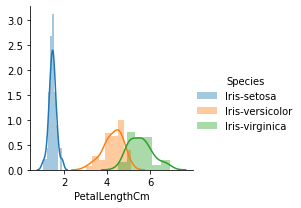

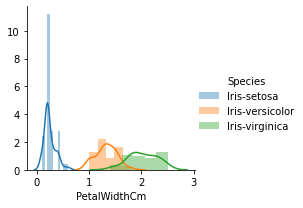

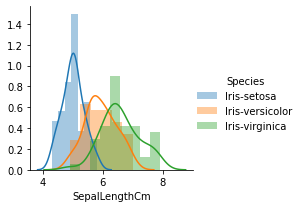

In [9]:
sb.FacetGrid(data,hue="Species",size=3).map(sb.distplot,"PetalLengthCm").add_legend()
sb.FacetGrid(data,hue="Species",size=3).map(sb.distplot,"PetalWidthCm").add_legend()
sb.FacetGrid(data,hue="Species",size=3).map(sb.distplot,"SepalLengthCm").add_legend()  
plt.show()

### Finding the number of Clusters

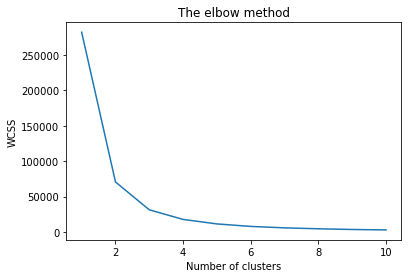

In [10]:
#Using the elbow method to determine the optimal number of clusters for k-means clustering
x = data.iloc[:, [0, 1, 2, 3]].values
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'    
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()    
    

- **From the above graph we found out that the elbow found out near '3' . So, we  are taking number of clusters '3' here**.

### Implementing K means

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


### Visualising the clusters

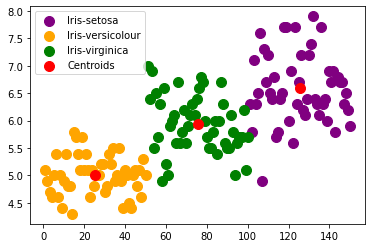

In [12]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

- Here we foud the clusted visual of setosa, versicolour and verginica